In [1]:
import pandas as pd

# Load the data
members = pd.read_csv('data/pp_members.csv')
recipes = pd.read_csv('data/pp_recipes.csv')
reviews = pd.read_csv('data/pp_reviews.csv')


/tmp/ipykernel_5383/71959988.py:5: DtypeWarning: Columns (35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  recipes = pd.read_csv('data/pp_recipes.csv')
/tmp/ipykernel_5383/71959988.py:6: DtypeWarning: Columns (4,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.read_csv('data/pp_reviews.csv')


In [2]:
members

,Unnamed: 0,member_id,member_url,member_name,member_description,member_status,member_avg_rating,member_map_pin,member_joined,follows_count,follow_me_count,avatar_url,new_member_id
0,0,911346,https://www.food.com/user/911346,jerome.a.fried,NaN,NaN,NaN,NaN,2008-08-01,0,0,https://geniuskitchen.sndimg.com/gk/img/avatar...,131066
1,1,2000090836,https://www.food.com/user/2000090836,Kimberly L.,NaN,NaN,NaN,NaN,2015-03-01,0,0,https://geniuskitchen.sndimg.com/gk/img/avatar...,131068
2,2,2002151276,https://www.food.com/user/2002151276,leslieS,NaN,Contributor,NaN,NaN,2018-05-01,0,0,https://geniuskitchen.sndimg.com/gk/img/avatar...,131067
3,3,472751,https://www.food.com/user/472751,rekseb,NaN,NaN,NaN,NaN,2006-04-01,0,0,https://geniuskitchen.sndimg.com/gk/img/avatar...,131069
4,4,2682835,https://www.food.com/user/2682835,XPICTHNA,NaN,NaN,NaN,NaN,2013-02-01,0,0,https://geniuskitchen.sndimg.com/gk/img/avatar...,131071
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299578,299578,1647974,https://www.food.com/user/1647974,michelle mcq,NaN,NaN,NaN,NaN,2010-07-01,1,0,https://geniuskitchen.sndimg.com/gk/img/avatar...,131064
299579,299579,230476,https://www.food.com/user/230476,KimberlyMoore,NaN,NaN,4.0,NaN,2005-07-01,0,0,https://geniuskitchen.sndimg.com/gk/img/avatar...,301040
299580,299580,607519,https://www.food.com/user/607519,markpearson,NaN,NaN,NaN,NaN,2007-10-01,0,0,https://geniuskitchen.sndimg.com/gk/img/avatar...,301041
299581,299581,349198,https://www.food.com/user/349198,Chef Duckie,NaN,NaN,NaN,NaN,2006-09-01,0,0,https://geniuskitchen.sndimg.com/gk/img/avatar...,131060


In [3]:
recipes

,Unnamed: 0,recipe_id,title,description,author_id,duration,directions,ingredients,serves,last_changed_date,...,sugars [g],protein [g],direction_size,ingredients_sizes,who_score,fsa_score,nutri_score,normalization_comment,ingredient_food_kg_urls,ingredient_food_kg_names
0,0,447642,Cranberry-Orange Caramel Corn,"Taken from Beter Homes and Gardens, November 2...",409184,40.0,['Preheat oven to 275 degrees. In a very large...,"{'': [('popcorn, popped', '12 time(s) cups ')...",20,2011-01-29,...,6.9,0.8,9,9,0.168254,0.000,0.00,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['baking soda', 'brown sugar', 'butter', 'corn..."
1,1,53662,Cocktail De Camarones,I ordered shrimp cocktail at a Mexican restaur...,64251,20.0,"['After you chop the tomatoes, onions and cila...",{'': [('shelled and cooked shrimp (50-60 count...,2-4,2009-06-03,...,6.3,51.3,7,10,0.335455,0.625,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['avocado', 'cilantro', 'cooked shrimp', 'garl..."
2,2,520465,Inbal Jerusalem Hotel Snowball,This recipe was created in response to a Janua...,1803632771,210.0,"['Combine gelatin with cold water', 'Combine c...","{'': [('cream', '200 time(s) g '), ('vanilla ...",5,2015-01-08,...,78.0,87.7,12,17,0.128082,0.000,0.00,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['cold water', 'condensed milk', 'cornflour', ..."
3,3,213601,Santorini Roasted Leg of Lamb,A succulent slow-roasted leg of lamb with herb...,183057,375.0,['Trim excess fat and silver skin from lamb le...,"{'': [('of lamb', '6 time(s) lbs leg '), ('dr...",10-12,2009-05-17,...,3.6,51.1,8,8,0.320622,0.375,0.00,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['dried mint flakes', 'dried oregano', 'dried ..."
4,4,67731,Cantonese Chicken Burgers,Adapted from a recipe in BHG's grilling magazine.,37779,38.0,"['In a mixing bowl, add the egg, sesame oil, a...","{'': [('egg, beaten', '1 time(s) '), ('toaste...",4,2007-11-21,...,4.2,30.3,6,12,0.254427,0.500,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['carrots', 'egg', 'fine dry breadcrumbs', 'ga..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507330,507330,161672,Southern Belle Bars,Pecan pie in an easy bar cookie form.,53959,70.0,"['Heat oven to 350°F ', 'Combine 1 1/4 cups f...","{'filling': [('dark corn syrup', '/ time(s) cu...",6-8,2021-07-20,...,32.0,7.0,4,11,0.122160,NaN,0.00,*,NaN,NaN
507331,507331,242936,Miriam's Egg Rolls,My sister introduced me to homemade egg rolls ...,461724,50.0,['Heat 2 tablespoons oil in wok or frying pan....,"{'': [('oil', '5 time(s) tablespoons '), ('gr...",5,2009-09-09,...,6.5,29.5,8,15,0.123409,0.250,0.00,NaN,NaN,NaN
507332,507332,51384,Creamy Chicken and Chile Casserole,"Yummy, creamy, fast, and easy! This could easi...",47175,40.0,"['Heat oven to 400°F.', 'Cook chicken over med...","{'': [('boneless skinless chicken breasts, cub...",NaN,2012-04-07,...,33.6,121.5,12,10,0.161195,0.000,0.00,NaN,NaN,NaN
507333,507333,406042,Won Ton's,Great as Pot Stickers or in a soup of chicken ...,335392,55.0,"['Combine all ingredients.', 'Place Won Ton wr...","{'': [('wonton wrappers (about 48)', '12 time...",6,2010-06-23,...,0.3,19.4,7,11,0.248843,0.375,0.25,NaN,NaN,NaN


In [4]:
reviews

,Unnamed: 0,member_id,recipe_id,rating,text,likes,last_modified_date,review_id,review_url,member_url,new_member_id,new_recipe_id
0,0,192799,96347,5.0,"I've never made ham & beans before, but I've a...",0.0,2005-05-02,171462.0,https://www.food.com/recipe/crock-pot-ham-and-...,https://www.food.com/user/192799,0,274797
1,1,394617,37139,2.5,Great curry. Will make again. I was thinking...,0.0,2012-03-25,1296592.0,https://www.food.com/recipe/curry-chicken-with...,https://www.food.com/user/394617,1,274880
2,2,170674,37139,5.0,This was really good even my picky kid loved i...,0.0,2011-10-03,1254955.0,https://www.food.com/recipe/curry-chicken-with...,https://www.food.com/user/170674,2,274880
3,3,1800369,37139,5.0,I used chicken base instead of beef bullion an...,0.0,2011-01-20,1184045.0,https://www.food.com/recipe/curry-chicken-with...,https://www.food.com/user/1800369,3,274880
4,4,126440,37139,5.0,I made half a recipe and it was just right for...,0.0,2010-12-24,1174963.0,https://www.food.com/recipe/curry-chicken-with...,https://www.food.com/user/126440,4,274880
...,...,...,...,...,...,...,...,...,...,...,...,...
1916419,1916419,53959,161672,6.0,NaN,NaN,2021-07-20,NaN,NaN,NaN,1118,507330
1916420,1916420,461724,242936,6.0,NaN,NaN,2009-09-09,NaN,NaN,NaN,878,507331
1916421,1916421,47175,51384,6.0,NaN,NaN,2012-04-07,NaN,NaN,NaN,12418,507332
1916422,1916422,335392,406042,6.0,NaN,NaN,2010-06-23,NaN,NaN,NaN,133034,507333


In [5]:

import json
import ast

# x for the row, ing_or_quant for the result column to return, ingredients (0) or their quantities (1)
def ing_process(x, ing_or_quant):

    try: 
        ing_list = ast.literal_eval(x)
    except:
        print(x)
        return None    

    try:
        res = list(ing_list.values())[0]
    except:
        print(ing_list)
        return None
    
    # for the ingredients return the 
    

    return [x[ing_or_quant] for x in res]


#recipe_raw = recipes['ingredients'][0]

# replace single with double quotes
#recipe_raw = recipe_raw.replace('\'', '"')

#ing_list = ast.literal_eval(recipe_raw)

#ing_list = list(ing_list.values())[0]

#ing_list

# copy this process for all rows of that column in recipes, to turn it into a new column of list of ingredients, and possibly a new column of list of quantities

recipes['ingredients_pp'] = recipes['ingredients'].apply(ing_process, args=(0,))

#recipe = json.loads(recipe_raw)

{}
nan
nan


In [6]:
#column for the ingredients list

recipes['ingredients_pp']
recipes['ingredients_pp'][0]

['popcorn, popped',
 'dried cranberries',
 'whole almond',
 'butter',
 'brown sugar, packed',
 'corn syrup (light color)',
 'orange juice',
 'vanilla',
 'baking soda']

In [7]:
# column for quantities

recipes['quantities_pp'] = recipes['ingredients'].apply(ing_process, args=(1,))

recipes['quantities_pp']

{}
nan
nan


0         [12  time(s) cups , 1  time(s) cup , 0.5 time(...
1         [1 -2  time(s) lb , 2 -3  time(s) , 0.5 time(s...
2         [200  time(s) g , 1  time(s) , 100  time(s) g ...
3         [6  time(s) lbs leg , 0.25 time(s) cup , 3  ti...
4         [1  time(s) , 1  time(s) teaspoon , 2  time(s)...
                                ...                        
507330    [/ time(s) cup , / time(s) cup , 2 time(s) , 3...
507331    [5  time(s) tablespoons , 1  time(s) , 0.5 tim...
507332    [2  time(s) , 1 time(s) (8 ounce) , 1 time(s) ...
507333    [12  time(s) ounces , 1  time(s) lb , 1 time(s...
507334    [4 time(s) (6 ounce) cans , 14  time(s) ounces...
Name: quantities_pp, Length: 507335, dtype: object

In [8]:
from igraph import Graph, plot, RainbowPalette
#empty dataframe with 3 columns, (from, to, weight) of dummydata for edges
links = pd.DataFrame(columns=['from', 'to', 'weight'])

net = Graph.DataFrame(links, directed=True, use_vids=False,vertices=recipes[0:10])

/home/ze/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [9]:
# for each column show the number of na values
# show this column where the val is not na : recipes['normalization_comment']
#recipes['ingredients_pp'].dropna()

# show unique values of a column type
recipes['ingredients_pp'].apply(type).unique()
# get the NoneType rows
recipes[recipes['ingredients_pp'].apply(type) == type(None)]
# drop these values
recipes = recipes.drop(recipes[recipes['ingredients_pp'].apply(type) == type(None)].index)

In [10]:
#df = recipes[:200]
import itertools 
from collections import defaultdict
# Create edges for recipes, based on ingredients in common as weight
def ing_freq_edge_weight(df):
    ingredients_freq = {}
    # frequency of each ingredient save to a dict
    for i in range(len(df)):
        for j in range(len(df.iloc[i]['ingredients_pp'])):
            if df.iloc[i]['ingredients_pp'][j] in ingredients_freq:
                ingredients_freq[df.iloc[i]['ingredients_pp'][j]] += 1
            else:
                ingredients_freq[df.iloc[i]['ingredients_pp'][j]] = 1

    print("ing freq", ingredients_freq)
    long_df = df.explode('ingredients_pp')
    graph_structure = defaultdict(dict)

    for ingredient, rows in long_df.groupby('ingredients_pp'):
        # Get all unique pairs of recipes containing this ingredient
        pairs = itertools.combinations(rows.index.unique(), 2)

        # Calculate weight based on ingredient frequency
        weight = 1 / ingredients_freq[ingredient]

        # Update the graph structure with the weight for each pair
        for a, b in pairs:
            if b in graph_structure[a]:
                graph_structure[a][b] += weight
                graph_structure[b][a] += weight
            else:
                graph_structure[a][b] = weight
                graph_structure[b][a] = weight

    # Convert the graph structure to a list of tuples [(index1, index2, weight), ...]
    index_pairs = [(a, b, graph_structure[a][b]) for a in graph_structure for b in graph_structure[a] if a < b]

    pairs_df = pd.DataFrame(index_pairs, columns=['from', 'to','weight'])
    return pairs_df


In [11]:
# get top recipes (top 1000)

pd.set_option('display.max_columns', 39)


# get the top 10000 recipes with the most ratings
top_recipes = recipes.sort_values(by='number_of_ratings', ascending=False)[0:10000]

top_recipes.head()

#select the top 1000 recipes with lowest average rating
#top_recipes = recipes.sort_values(by='average_rating', ascending=False)[0:10000]
#top_recipes

,Unnamed: 0,recipe_id,title,description,author_id,duration,directions,ingredients,serves,last_changed_date,food_kg_locator,recipe_url,tags,new_recipe_id,new_author_id,average_rating,number_of_ratings,servingsPerRecipe,servingSize [g],calories [cal],caloriesFromFat [cal],totalFat [g],saturatedFat [g],cholesterol [mg],sodium [mg],totalCarbohydrate [g],dietaryFiber [g],sugars [g],protein [g],direction_size,ingredients_sizes,who_score,fsa_score,nutri_score,normalization_comment,ingredient_food_kg_urls,ingredient_food_kg_names,ingredients_pp,quantities_pp
205530,205530,45809,Bourbon Chicken,I searched and finally found this recipe on th...,58278,35.0,"[""Editor's Note: Named Bourbon Chicken becaus...","{'': [('boneless chicken breasts, cut into bit...",4,2022-09-05,http://idea.rpi.edu/heals/kb/recipe/93c636e7-B...,https://www.food.com/recipe/bourbon-chicken-45809,NaN,205530,24695,4.58,3081,4,330.0,521.4,220.0,24.5,6.5,145.3,1573.0,23.4,0.3,21.5,50.1,8,11,0.227273,0.125,0.00,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['apple cider vinegar', 'bacon', 'black pepper...","[boneless chicken breasts, cut into bite-size ...","[2 time(s) lbs , 1 -2 time(s) tablespoon , 1..."
241570,241570,2886,Best Banana Bread,You'll never need another banana bread recipe ...,1762,70.0,"['Remove odd pots and pans from oven.', 'Prehe...","{'': [('butter, softened', '0.5 time(s) cup ')...",10,2022-08-05,http://idea.rpi.edu/heals/kb/recipe/b4072de6-B...,https://www.food.com/recipe/best-banana-bread-...,"['time-to-make', 'course', 'main-ingredient', ...",241570,279306,4.81,2300,10,96.0,272.8,94.0,10.5,6.2,61.6,338.3,42.5,1.4,24.4,3.7,10,8,0.131448,0.125,0.00,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['butter', 'flour', 'milk', 'onion', 'pepper',...","[butter, softened, granulated sugar, eggs, bea...","[0.5 time(s) cup , 1 time(s) cup , 2 time(s)..."
373713,373713,27208,To Die for Crock Pot Roast,"Amazing flavor, and so simple! No salt needed ...",28201,545.0,"['Place beef roast in crock pot.', 'Mix the dr...","{'': [('beef roast, any kind', '1 time(s) (4 -...",8,2022-03-04,http://idea.rpi.edu/heals/kb/recipe/96a17783-T...,https://www.food.com/recipe/to-die-for-crock-p...,"['weeknight', 'time-to-make', 'course', 'main-...",373713,3905,4.58,1699,8,245.0,295.2,87.0,9.7,3.9,149.8,380.6,2.6,0.1,0.0,49.5,8,5,0.275316,0.500,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['boneless skinless chicken thighs', 'dried or...","[beef roast, any kind, package brown gravy mix...","[1 time(s) (4 -5 lb) , 1 time(s) (1 1/4 ounce)..."
94958,94958,89204,Crock-Pot Chicken With Black Beans & Cream Cheese,I love this Crock-Pot chicken recipe for two r...,137839,243.0,"['Take 4-5 frozen, yes, frozen, boneless chick...","{'': [('boneless chicken breasts, frozen', '4 ...",4,2021-12-01,http://idea.rpi.edu/heals/kb/recipe/7f876704-C...,https://www.food.com/recipe/crock-pot-chicken-...,"['time-to-make', 'course', 'main-ingredient', ...",94958,29104,4.46,1660,4,493.0,679.2,315.0,35.0,15.2,155.3,913.4,50.1,11.2,9.9,45.9,5,5,0.232010,0.250,0.00,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['butter', 'flour', 'fresh spinach', 'frozen s...","[boneless chicken breasts, frozen, black beans...","[4 -5 time(s) , 1 time(s) (15 1/2 ounce) can ..."
378770,378770,39087,Creamy Cajun Chicken Pasta,N'awlin's style of chicken with an updated Alf...,30534,25.0,['Place chicken and Cajun seasoning in a bowl ...,{'': [('boneless skinless chicken breast halve...,2,2022-07-27,http://idea.rpi.edu/heals/kb/recipe/e77fc080-C...,https://www.food.com/recipe/creamy-cajun-chick...,"['30-minutes-or-less', 'time-to-make', 'course...",378770,1057,4.84,1601,2,373.0,719.1,370.0,41.1,24.0,198.6,816.8,47.4,2.5,3.1,39.3,4,12,0.186008,0.250,0.00,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['Dr. Pepper cola', 'basil', 'crushed red pepp...","[boneless skinless chicken breast halves, cut ...","[2 time(s) , 4 time(s) ounces , 2 time(s) t..."


In [12]:
links = ing_freq_edge_weight(top_recipes)

import matplotlib.pyplot as plt

net = Graph.DataFrame(links, directed=False, use_vids=False,vertices=top_recipes)

ing freq {'boneless chicken breasts, cut into bite-size pieces': 1, 'olive oil': 1024, 'garlic clove, crushed': 25, 'ginger': 66, 'crushed red pepper flakes': 85, 'apple juice': 15, 'light brown sugar': 43, 'ketchup': 165, 'cider vinegar': 90, 'water': 1312, 'soy sauce': 387, 'butter, softened': 220, 'granulated sugar': 278, 'eggs, beaten': 139, 'bananas, finely crushed (for serious and extreme moist and delicious, try 4 bananas)': 1, 'all-purpose flour': 839, 'baking soda': 877, 'salt': 3774, 'vanilla (optional)': 12, 'beef roast, any kind': 1, 'package brown gravy mix, dry': 1, 'mix': 162, 'mix, dry': 1, 'boneless chicken breasts, frozen': 1, 'black beans': 23, 'corn': 13, 'jar salsa, any kind': 1, 'package cream cheese': 39, 'boneless skinless chicken breast halves, cut into thin strips': 4, 'linguine, cooked al dente': 1, 'cajun seasoning (your recipe, $notetemplate1$ or store-bought)': 1, 'butter': 1224, 'thinly sliced green onion': 9, 'heavy whipping cream': 24, 'chopped sun-drie

In [13]:

#plot(net, vertex_size=3, vertex_color='lightblue',edge_arrow_size=0.4 ,arrow_width=1, edge_width=net.es['weight'], edge_color='grey')
#zoom in on the plot to see the edges

weights = net.es['weight']

min_weight = min(weights)
max_weight = max(weights)

#if min_weight == max_weight:
#    normalized_weights = [0.5 for _ in weights]
#else:
#    normalized_weights = [(float(weight) - min_weight) / (max_weight - min_weight) for weight in weights]

# Use a colormap from matplotlib
#cmap = plt.get_cmap('viridis')  # You can change 'viridis' to any colormap you like

# Map normalized weights to colors
#colors = [cmap(weight) for weight in normalized_weights]

def rgba_to_hex(rgba):
    r, g, b, a = rgba
    return '#{:02x}{:02x}{:02x}'.format(int(r * 255), int(g * 255), int(b * 255))

#hex_colors = [rgba_to_hex(color) for color in colors]

# Convert RGBA colors to HEX format for igraph
#hex_colors = [plt for color in colors]


#plot(net, target="plots/graph_ingredients.png" ,vertex_size=3, vertex_color='lightblue',edge_arrow_size=0.4 ,arrow_width=1, edge_width=[w * 10 for w in weights], edge_color=hex_colors, bbox=(0,0,1000,1000))    

In [14]:
# cluster detection algorithm
clusters = net.community_multilevel(weights=net.es['weight'])

print(clusters)

Clustering with 10000 elements and 143 clusters
[  0] 205530, 433221, 257493, 244549, 329191, 94945, 198237, 501184, 171888,
      363068, 468036, 234811, 266342, 473934, 205474, 182048, 181119, 228227,
      228781, 330886, 222733, 211835, 166960, 72447, 385168, 297081, 32706,
      191565, 88980, 356967, 181425, 172203, 241819, 450454, 260322, 138098,
      189134, 294145, 258505, 443585, 464401, 371648, 212250, 309565, 316123,
      26773, 55356, 214485, 394919, 310004, 89200, 422775, 294046, 200712,
      119649, 391209, 162059, 250052, 333905, 344558, 13873, 164578, 257613,
      121437, 234827, 366980, 20322, 476454, 415980, 374542, 202933, 336146,
      84720, 161406, 454307, 165997, 230513, 64757, 266724, 210027, 408514,
      294112, 163101, 339473, 201783, 401431, 344120, 52627, 430725, 159434,
      74743, 186357, 359121, 389824, 206452, 499235, 444149, 170527, 180909,
      180474, 431447, 107785, 52969, 495044, 252828, 157663, 172535, 230386,
      285705, 252533, 358833, 

In [15]:
node_titles = net.vs['title']

# Print the clusters with node titles
for i, cluster in enumerate(clusters):
    node_titles_in_cluster = [node_titles[node_id] for node_id in cluster]
    no_of_recipes = len(node_titles_in_cluster)
    if no_of_recipes > 1:
        print(f"[{i}] ({no_of_recipes}) {' || '.join(node_titles_in_cluster)}")

[0] (1468) Bourbon Chicken || Yes, Virginia There is a Great Meatloaf || Japanese Mum's Chicken || The Best Easy Beef and Broccoli Stir-Fry || My Family's Favorite Sloppy Joes (Pizza Joes) || Pork Chops Yum-Yum || Chinese Fried Rice || Funky Chicken With Sesame Noodles || Sesame Chicken || Best Grilled Pork Chops || Szechuan Noodles With Spicy Beef Sauce || Awesome Baked Ham || Easy and Tasty Barbecue Chicken Sandwiches in the Crock Pot || Restaurant Teriyaki Sauce || Kung Pao Chicken || Caramelized Baked Chicken Legs/Wings || General Tso's Chicken || Crock Pot Garlic Brown Sugar Chicken || Steak Marinade || Southern Fried Chicken || Classic Potato Salad || BLT Pasta Salad || Potato Salad || Mean Guy's General Tso's Chicken || The  Blue Mill Tavern Loosemeat Sandwich || Amazing Chicken Marinade || Beef Patties in Onion Gravy || Caramelized Butternut Squash || Crock Pot Chops That Will Make You Eat Til You Pop! || Slow Cook Down Home Pork Chops and Gravy || Macaroni Salad || Broccoli Sa

In [16]:
import numpy as np

num_clusters = len(set(clusters.membership))

# Generate random colors for clusters
vertex_colors = [plt.cm.tab10(i) for i in np.linspace(0, 1, num_clusters)]

# Plot the graph with clusters highlighted
#plot(net, target="plots/graph_ingredients_clusters.png", vertex_size=5, vertex_color=vertex_colors, edge_width=0.1, edge_arrow_size=0.4 ,arrow_width=1, bbox=(0,0,1000,1000))

## Parte do Doutor. José Araújo MD


In [17]:
#num_clusters = len(clusters)
#vertex_colors = [plt.cm.tab10(i) for i in np.linspace(0, 1, num_clusters)]

# Create a layout based on community membership
layout = net.layout_fruchterman_reingold()  # You can use any layout here

# Plot each cluster separately
for i, cluster in enumerate(clusters):
    subgraph = net.subgraph(cluster)

    if(len(subgraph.vs) < 5): # minimum number of nodes in a cluster
        continue
    # n é ig.plot 
    plot(subgraph, target=f"plots/cluster_{i}.png", vertex_size=5, vertex_color=vertex_colors[i], edge_width=0.1, edge_arrow_size=0.4, arrow_width=1, bbox=(0,0,500,500), layout=layout)

## Recommender System for MovieLens Dataset

In [18]:
print(f"Number of recipes: {len(top_recipes)}")
# get reviews with recipe_id in top_recipes
#reviews

#reviews[reviews['recipe_id'] == 45809]
#print(f"length reviews: {len(top_reviews)}")

#print(f"Total unique users: {len(top_reviews['member_id'].unique())}")
# dict where key = recip, value = tuple/pair of (member_id, rating)
#reviews_dict = top_reviews.groupby('recipe_id').apply(lambda x: list(zip(x['member_id'], x['rating']))).to_dict()

def create_reviews_dict(recipes_ids):
    top_reviews = reviews[reviews['recipe_id'].isin(recipes_ids)]
    reviews_dict = top_reviews.groupby('recipe_id').apply(lambda x: list(zip(x['member_id'], x['rating']))).to_dict()
    return top_reviews, reviews_dict
    

top_reviews, reviews_dict = create_reviews_dict(top_recipes['new_recipe_id'])

# Sparsity
sparsity = len(top_reviews) / (len(top_recipes) * len(top_reviews['member_id'].unique()))

#print format for 5 numbers
print(f"Sparsity: {sparsity:.2%}")

Number of recipes: 10000
Sparsity: 0.02%


## Use as sample the largest Cluster of the MovieLens Dataset

In [19]:
#print(clusters)
# sort cluster by size
#clusters = sorted(clusters, key=len, reverse=True)
# get largest cluster
top_cluster = max(clusters, key=len)
top_cluster
print(len(top_cluster))
# get the ids in the top cluster
top_cluster_ids = [net.vs[node_id]['new_recipe_id'] for node_id in top_cluster]
top_cluster_ids

cluster_reviews, cluster_reviews_dict = create_reviews_dict(top_cluster_ids)


4277


In [20]:
# Create dataframe for the cluster dictionary
def create_ratings_df(ratings_dict):
    ratings_rows = []
    for recipe_id, ratings in ratings_dict.items():
        for member_id, rating in ratings:
            ratings_rows.append((member_id, recipe_id, rating))

    ratings_df = pd.DataFrame(ratings_rows, columns=['member_id', 'recipe_id', 'rating'])
    return ratings_df

ratings_sample_df = create_ratings_df(cluster_reviews_dict)

### Split the data between train and test

In [21]:
from surprise import Dataset, Reader, SVD, KNNWithMeans, accuracy
from surprise.model_selection import train_test_split

# Find maximum and minimum rating
max_rating = ratings_sample_df['rating'].max()
min_rating = ratings_sample_df['rating'].min()
print(max_rating, min_rating)

reader = Reader(rating_scale=(min_rating, max_rating))

data = Dataset.load_from_df(ratings_sample_df, reader)

#print the first 5 rows of the dataset
print(data.df.head())

trainset, testset = train_test_split(data, test_size=0.2)

6.0 1.0
    member_id  recipe_id  rating
0     2123645         38     4.0
1  1802956262         38     4.0
2     1060485         38     4.0
3      596506         38     5.0
4        1533         38     6.0


### Content-based filtering

Using tf-idf for description terms to identify similarities between descriptions and as a result similarity between recipes. Given a recipe, suggest others. 

In [22]:
# Content-based filtering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

top_recipes_filtered = top_recipes.dropna(subset=['description'])

tfidf_vectorizer = TfidfVectorizer()
item_features = tfidf_vectorizer.fit_transform(top_recipes_filtered['description'])

# Calculate the cosine similarity matrix
cosine_sim = cosine_similarity(item_features, item_features)

# Get the top 10 similar recipes for each recipe
top_n_indices = np.argsort(-cosine_sim, axis=1)[:, 1:11]

# Get the recipe IDs for the top 10 similar recipes
top_n_recipe_ids = top_recipes_filtered['new_recipe_id'].values[top_n_indices]

# Create a dictionary where the key is the recipe ID and the value is a list of the top 10 similar recipe IDs
similar_recipes_dict = {recipe_id: top_n_recipe_ids[i].tolist() for i, recipe_id in enumerate(top_recipes_filtered['new_recipe_id'])}

# list some of the available recipe ids
list(similar_recipes_dict.keys())[0:5]

[205530, 241570, 373713, 94958, 378770]

In [23]:
# Get the top 10 similar recipes for a specific recipe
recipe_id = 205530
similar_recipe_ids = similar_recipes_dict[recipe_id]
similar_recipe_ids

[205532, 93972, 31648, 54906, 104790, 280294, 501387, 270341, 151125, 242857]

In [24]:
# get recipe entry for the recipe_id
recipe = top_recipes_filtered[top_recipes_filtered['new_recipe_id'] == recipe_id]
recipe2 = top_recipes_filtered[top_recipes_filtered['new_recipe_id'] == similar_recipe_ids[1]]

recipe
recipe2

,Unnamed: 0,recipe_id,title,description,author_id,duration,directions,ingredients,serves,last_changed_date,food_kg_locator,recipe_url,tags,new_recipe_id,new_author_id,average_rating,number_of_ratings,servingsPerRecipe,servingSize [g],calories [cal],caloriesFromFat [cal],totalFat [g],saturatedFat [g],cholesterol [mg],sodium [mg],totalCarbohydrate [g],dietaryFiber [g],sugars [g],protein [g],direction_size,ingredients_sizes,who_score,fsa_score,nutri_score,normalization_comment,ingredient_food_kg_urls,ingredient_food_kg_names,ingredients_pp,quantities_pp
93972,93972,142346,Chinese Restaurant Fried Rice,Chinese fried rice that tastes just like in th...,254405,40.0,"[""Cook your rice (I use a rice cooker). You wa...","{'': [('uncooked basmati rice', '2 time(s) cu...",2-4,2019-05-02,http://idea.rpi.edu/heals/kb/recipe/cac73f90-C...,https://www.food.com/recipe/chinese-restaurant...,"['60-minutes-or-less', 'time-to-make', 'course...",93972,283134,4.46,58,2,302.0,999.8,288.0,32.0,4.4,187.8,1509.2,150.9,8.1,4.7,26.1,8,9,0.256623,0.5,0.0,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['4% fat cottage cheese', 'baking powder', 'ba...","[uncooked basmati rice, water, chicken stock, ...","[2 time(s) cups , 2 time(s) cups , 1/2-3/ ti..."


#### Applying a model

The model below (logistic regression) is attempting to predict the average ratings of recipes based on their textual descriptions, and the accuracy metric indicates how well the model fits the data.

In [25]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(item_features, top_recipes_filtered['average_rating'])

# Predict the ratings for the recipes
predicted_ratings = model_lr.predict(item_features)

accuracy = model_lr.score(item_features, top_recipes_filtered['average_rating'])
print(f"Model accuracy: {accuracy:.2%}")

Model accuracy: 89.92%


In [26]:
top_recipes_filtered['predicted_rating'] = predicted_ratings

top_n_recommendations = top_recipes_filtered.sort_values(by='predicted_rating', ascending=False)[0:10]

top_n_recommendations[['recipe_id', 'title', 'predicted_rating']]

/tmp/ipykernel_5383/4012494500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_recipes_filtered['predicted_rating'] = predicted_ratings


,recipe_id,title,predicted_rating
365258,218193,Sweet Butter Bread (Bread Machine),5.134407
328859,63836,Chilean Salsa,5.118793
116804,245231,Vegan Spelt Banana Bread,5.117857
1002,55351,Crackle-Top Molasses Cookies,5.092755
429412,496591,"Crab, Prosciutto & Green Onion Potato Cakes! #...",5.092235
165430,144969,Mexican Chef Salad,5.091423
201426,238951,Tuna Macaroni Salad,5.089807
434659,51171,Cake Decorating Icing,5.083925
505862,183798,Southern Living Pinto Beans,5.062867
432189,189335,How to Bake a Cake (With Small Children Around!),5.061967


In [27]:
recipe_id = 189335
rating = top_n_recommendations[top_n_recommendations['recipe_id'] == recipe_id]['average_rating']
rating

432189    5.0
Name: average_rating, dtype: float64

### Apply Algorithms

In [28]:
from surprise import KNNWithMeans, SVD
from surprise import accuracy

def calculate_precision_recall(predictions, threshold=4):
    # Initialize counters
    tp = fp = fn = 0

    for uid, _, true_r, est, _ in predictions:
        if est >= threshold:  # Predicted rating is above the threshold
            if true_r >= threshold:  # True rating is also above the threshold
                tp += 1  # True positive
            else:
                fp += 1  # False positive
        else:  # Predicted rating is below the threshold
            if true_r >= threshold:  # True rating is above the threshold
                fn += 1  # False negative

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1

def evaluate_algorithm(algo, trainset, testset):
    algo.fit(trainset)
    predictions = algo.test(testset)
    rmse = accuracy.rmse(predictions)
    precision, recall, f1 = calculate_precision_recall(predictions)
    return algo, rmse, precision, recall, f1

### Item-based collaborative filtering

In [29]:
# Item based collaborative filtering
algo_svd = SVD()
algo_knn_item = KNNWithMeans(sim_options={'name': 'cosine', 'user_based': False})
algo_knn_item2 = KNNWithMeans(sim_options={'name': 'pearson', 'user_based': False})

model_svd, rmse_svd, precision_svd, recall_svd, f1_svd = evaluate_algorithm(algo_svd, trainset, testset)
model_knn, rmse_knn, precision_knn, recall_knn, f1_knn = evaluate_algorithm(algo_knn_item, trainset, testset)   
model_knn2, rmse_knn2, precision_knn2, recall_knn2, f1_knn2 = evaluate_algorithm(algo_knn_item2, trainset, testset)

print("--------------------")
print(f"SVD RMSE: {rmse_svd}")
print(f"SVD Precision: {precision_svd}")
print(f"SVD Recall: {recall_svd}")
print(f"SVD F1: {f1_svd}")
print("--------------------")
print(f"KNN RMSE: {rmse_knn}")
print(f"KNN Precision: {precision_knn}")
print(f"KNN Recall: {recall_knn}")
print(f"KNN F1: {f1_knn}")
print("--------------------")
print(f"KNN2 RMSE: {rmse_knn2}")
print(f"KNN2 Precision: {precision_knn2}")
print(f"KNN2 Recall: {recall_knn2}")
print(f"KNN2 F1: {f1_knn2}")

RMSE: 0.9393
Computing the cosine similarity matrix...


Done computing similarity matrix.
RMSE: 1.1003
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0928
--------------------
SVD RMSE: 0.9393097956475751
SVD Precision: 0.9158064516129032
SVD Recall: 0.998593035525853
SVD F1: 0.955409725727747
--------------------
KNN RMSE: 1.1002564368945993
KNN Precision: 0.916083916083916
KNN Recall: 0.9676398170946183
KNN F1: 0.9411563462196373
--------------------
KNN2 RMSE: 1.0928193443230612
KNN2 Precision: 0.9157617637380717
KNN2 Recall: 0.9788955328877946
KNN2 F1: 0.9462767766065965


### User-based collaborative filtering

In [30]:
# User based collaborative filtering
algo_knn_user = KNNWithMeans(sim_options={'name': 'cosine', 'user_based': True})
algo_knn_user2 = KNNWithMeans(sim_options={'name': 'pearson', 'user_based': True})

model_knn_user, rmse_knn_user, precision_knn_user, recall_knn_user, f1_knn_user = evaluate_algorithm(algo_knn_user, trainset, testset)
model_knn_user2, rmse_knn_user2, precision_knn_user2, recall_knn_user2, f1_knn_user2 = evaluate_algorithm(algo_knn_user2, trainset, testset)

print("--------------------")
print(f"KNN User RMSE: {rmse_knn_user}")
print(f"KNN User Precision: {precision_knn_user}")
print(f"KNN User Recall: {recall_knn_user}")
print(f"KNN User F1: {f1_knn_user}")
print("--------------------")
print(f"KNN User2 RMSE: {rmse_knn_user2}")
print(f"KNN User2 Precision: {precision_knn_user2}")
print(f"KNN User2 Recall: {recall_knn_user2}")
print(f"KNN User2 F1: {f1_knn_user2}")

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0162
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9977
--------------------
KNN User RMSE: 1.0162345592585234
KNN User Precision: 0.9185969556585043
KNN User Recall: 0.9764333450580372
KNN User F1: 0.9466325660699062
--------------------
KNN User2 RMSE: 0.9977198052704321
KNN User2 Precision: 0.9183338799606429
KNN User2 Recall: 0.9848751319029194
KNN User2 F1: 0.9504412763068568


### Predict for a user

Predict ratings for user-item pairs using a given model. If a user-item pair has a known rating in the input data, it retains that rating, otherwise, it predicts a rating using the model.

In [31]:
users_seen = trainset.all_users()
items_seen = trainset.all_items()

raw_users_seen_ids = [trainset.to_raw_uid(uid) for uid in users_seen]
raw_items_seen_ids = [trainset.to_raw_iid(iid) for iid in items_seen]

user_test_id = 1

# Check if a user is in the training set
if user_test_id in raw_users_seen_ids:
    print(f"User {user_test_id} is in the training set")
else:
    print(f"User {user_test_id} is not in the training set")
    # Select a random user from the training set
    #user_test_id = raw_users_seen_ids[0]

    # Select a user with at least 15 ratings
    #while len(trainset.ur[trainset.to_inner_uid(user_test_id)]) < 15:
    #    user_test_id = raw_users_seen_ids[np.random.randint(0, len(raw_users_seen_ids))]
    # Select a user with max amount of ratings
    #user_test_id = max(raw_users_seen_ids, key=lambda x: len(trainset.ur[trainset.to_inner_uid(x)]))
    # Select a user with lowest average of ratings and at least 5 ratings
    user_test_id = min(raw_users_seen_ids, key=lambda x: np.mean([r for (_, r) in trainset.ur[trainset.to_inner_uid(x)]]))    

    print(f" selecting user {user_test_id} instead")


def predict_ratings(model, raw_users, raw_items, data):
    predictions = {}
    # Add to the predictions dictionary all ratings that were previously known
    for user_id, item_id, rating in data.itertuples(index=False):
        predictions[(user_id, item_id)] = rating

    # Save the predictions to file
    with open('predictions.csv', 'w') as f:
        for (user_id, item_id), rating in predictions.items():
            f.write(f"{user_id},{item_id},{rating}\n")
    

    for user_id in raw_users:
        if user_id == 311157:
            print("user_id", user_id)
        for item_id in raw_items:
            if (user_id, item_id) not in predictions:
                prediction = model.predict(user_id, item_id)
                predictions[(user_id, item_id)] = prediction.est

    with open('final_predictions.csv', 'w') as f:
        for (user_id, item_id), rating in predictions.items():
            f.write(f"{user_id},{item_id},{rating}\n")

    
    
    # Show predictions distribution for predictions values below 2.5
    #plt.hist([v for v in predictions.values() if v < 4.5], bins=20)
    return predictions

User 1 is not in the training set
 selecting user 2000184279 instead


In [32]:
# Item based
pred_svd = predict_ratings(model_svd, raw_users_seen_ids, raw_items_seen_ids, ratings_sample_df)
pred_knn = predict_ratings(model_knn, raw_users_seen_ids, raw_items_seen_ids, ratings_sample_df)
pred_knn2 = predict_ratings(model_knn2, raw_users_seen_ids, raw_items_seen_ids, ratings_sample_df)

user_id 311157
user_id 311157
user_id 311157


In [33]:
# User based
pred_knn_user = predict_ratings(model_knn_user, raw_users_seen_ids, raw_items_seen_ids, ratings_sample_df)
pred_knn_user2 = predict_ratings(model_knn_user2, raw_users_seen_ids, raw_items_seen_ids, ratings_sample_df)

user_id 311157
user_id 311157


### Get Top-N Recommendations

In [34]:
# Get top 5 recommendations for a user from the ones he hasn't rated yet
def get_top_n_recommendations(predictions, user_id, data, n=5):
    # Get the items the user has not rated yet
    items_not_rated = data[data['member_id'] != user_id]['recipe_id'].unique()
    print(len(items_not_rated))
    # Get the top n recommendations for the user
    user_predictions = [(iid, pred) for (uid, iid), pred in predictions.items() if uid == user_id and iid in items_not_rated]   

    # Get all items the user has rated
    items_rated = data[data['member_id'] == user_id]['recipe_id'].unique()
    print(len(items_rated))

    user_ratings = [(iid, pred) for (uid, iid), pred in predictions.items() if uid == user_id and iid in items_rated] 

    # Show user_ratings distribution
    #plt.hist([x[1] for x in user_ratings], bins=20)  
 

    #Show user_predictions distribution
    #plt.hist([x[1] for x in user_predictions], bins=20)
    print(len(user_predictions))
    user_predictions.sort(key=lambda x: x[1], reverse=True)
    return user_predictions[:n]

In [35]:
top_n_svd = get_top_n_recommendations(pred_svd, user_test_id, ratings_sample_df,20)
top_n_knn = get_top_n_recommendations(pred_knn, user_test_id, ratings_sample_df,20)
top_n_knn2 = get_top_n_recommendations(pred_knn2, user_test_id, ratings_sample_df,20)

# pred histogram
# Show predictions distribution for predictions values below 2.5
#plt.hist([v for v in pred.values() if v <= 2.5], bins=100)
print("User ID:", user_test_id)
print("--------------------")
print("SVD: ", top_n_svd)
print("KNN: ", top_n_knn)
print("KNN2: ", top_n_knn2)

4138
1
3730
4138
1
3730
4138
1
3730
User ID: 2000184279
--------------------
SVD:  [(224720, 5.141898106843004), (72462, 5.109165799140565), (341013, 5.046623739616804), (54973, 5.033354653021982), (162510, 5.024810832915203), (104691, 5.021595978985079), (229186, 5.013671573006107), (161932, 5.007486764078963), (467692, 5.005908348139913), (165476, 4.997898539879349), (388001, 4.99520605501795), (310339, 4.990510857034883), (358860, 4.986038795821371), (232886, 4.981498021610987), (265452, 4.980243130945126), (139044, 4.977882467567912), (22006, 4.977376654390883), (300144, 4.9773198344649074), (267202, 4.97257444295401), (407850, 4.972505065256305)]
KNN:  [(128005, 6.0), (227286, 6.0), (449780, 6.0), (439529, 6.0), (149834, 6.0), (47095, 6.0), (434921, 6.0), (277155, 6.0), (130351, 6.0), (267245, 6.0), (218630, 6.0), (218241, 6.0), (194331, 6.0), (358141, 6.0), (425391, 6.0), (419907, 6.0), (378501, 6.0), (321839, 6.0), (487751, 6.0), (237864, 6.0)]
KNN2:  [(128005, 6.0), (227286, 6.

In [36]:
top_n_knn_user = get_top_n_recommendations(pred_knn_user, user_test_id, ratings_sample_df,20)
top_n_knn_user2 = get_top_n_recommendations(pred_knn_user2, user_test_id, ratings_sample_df,20)

print("--------------------")
print("KNN User: ", top_n_knn_user)
print("KNN User2: ", top_n_knn_user2)

4138
1
3730
4138
1
3730
--------------------
KNN User:  [(428288, 1.8181818181818183), (387604, 1.75), (503915, 1.75), (235364, 1.6875), (468219, 1.6875), (70758, 1.6875), (390803, 1.6875), (198914, 1.6875), (364972, 1.6875), (143412, 1.6875), (69485, 1.6875), (322853, 1.6875), (67591, 1.6875), (171946, 1.6875), (332252, 1.6875), (200972, 1.6875), (248978, 1.6875), (221682, 1.6875), (171625, 1.6875), (390605, 1.6875)]
KNN User2:  [(204210, 1.0), (356279, 1.0), (7378, 1.0), (29301, 1.0), (369426, 1.0), (50493, 1.0), (167549, 1.0), (288407, 1.0), (261107, 1.0), (408258, 1.0), (505862, 1.0), (128005, 1.0), (205416, 1.0), (63024, 1.0), (128989, 1.0), (344776, 1.0), (216016, 1.0), (69227, 1.0), (402663, 1.0), (227286, 1.0)]


(array([ 164.,    0.,    0.,    0.,  139.,    0.,  614.,    0.,  432.,
           0.,    0.,    0., 2004.,    0.,    0.,    0., 8042.,    0.,
           0., 4135.]),
 array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 ,
        3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 , 5.75, 6.  ]),
 <BarContainer object of 20 artists>)

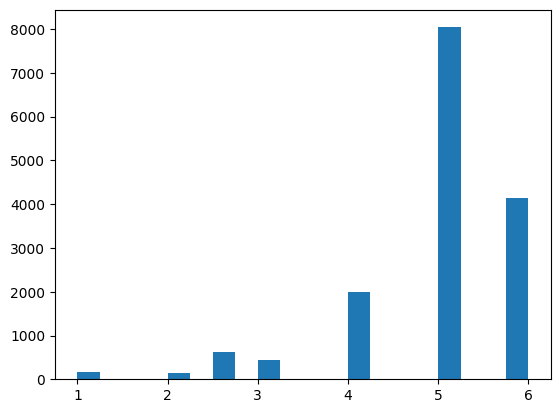

In [37]:
# Show ratings_sample_df ratings distribution
plt.hist(ratings_sample_df['rating'], bins=20)